# Basic water mass analysis example notebook for MPAS-Ocean

Uses `watermasstools.py` in the `modules` directory.

***

In [1]:
import numpy as np
import xarray as xr
import yaml
import sys
import matplotlib.pyplot as plt

# Import modules from path
sys.path.append('../modules/')
import watermasstools as wmttools

# Set plot font sizes
plt.rcParams.update({'font.size': 10, 'axes.titlesize': 'medium'})

In [ ]:
# Mask stuff

#regionList = ['Greenland Sea', 'Iceland Basin', 'Irminger Sea', 'Labrador Sea', 'Norwegian Sea']

# Load mask variables
#with xr.open_dataset(maskfile) as ds:
#    regionNames = ds.regionNames.values.astype(str)
#    regionMasks = ds.regionCellMasks

# Subdomain
#index = np.isin(regionNames, regionList)
#subdomain = regionMasks[:, index].sum(dim='nRegions').astype(bool)

In [2]:
# Paths
meshfile = '/global/cfs/cdirs/e3sm/inputdata/ocn/mpas-o/EC30to60E2r2/ocean.EC30to60E2r2.210210.nc'
maskfile = '/pscratch/sd/b/bmoorema/maskfiles/EC30to60E2r2_NAmodewatermasks20230915.nc'
#resultspath = '/pscratch/sd/k/katsmith/v2.1Paper/v2Extension/'
#filename = 'v2.LR.piControl.mpaso.hist.am.timeSeriesStatsMonthly.0501-01-01.nc'
resultspath = '/pscratch/sd/a/abarthel/'
filename = 'v2.LR.piControl.mpaso.hist.am.timeSeriesStatsMonthly.annual.0531-0533.nc'

In [56]:
# Load mesh variables
with xr.open_dataset(meshfile) as ds:
    areaCell = ds.areaCell
    #lonCell = np.rad2deg(ds.lonCell)
    #latCell = np.rad2deg(ds.latCell)
    #lonCell[lonCell > 180] = lonCell[lonCell > 180] - 360

# Load results
with xr.open_dataset(resultspath + filename) as ds:
    
    # Get S, T and statevars
    names, prefix = ['salinity', 'temperature'], 'timeMonthly_avg_activeTracers_'
    S, T = [ds[prefix + name][0, :, 0] for name in names]
    statevars = wmttools.calc_state_variables(S, T)
    
    # Get buoyancy fluxes
    fluxes = wmttools.build_combined_fluxes(ds, statevars)
    
    # Calculate water mass transformation
    wmt = wmttools.calc_wmt(fluxes, statevars['sigmaTheta'], areaCell)

/global/common/software/e3sm/anaconda_envs/base/envs/e3sm_unified_1.9.1_login/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [57]:
wmt_annual531to3= wmt

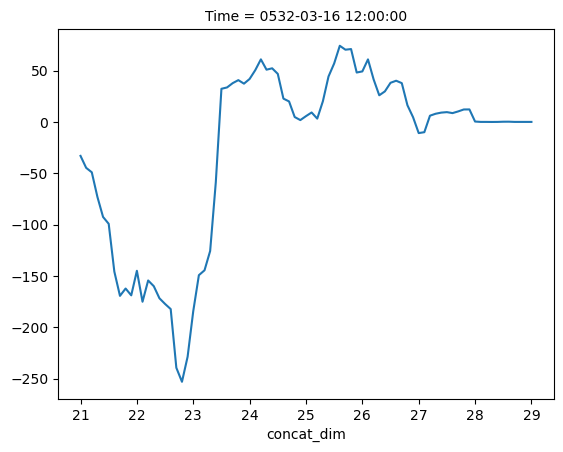

In [23]:
# Plot water mass transformation # March of year 531-533 v2.1
wmt['totalTrans'].plot()

In [ ]:
# Don't run below!

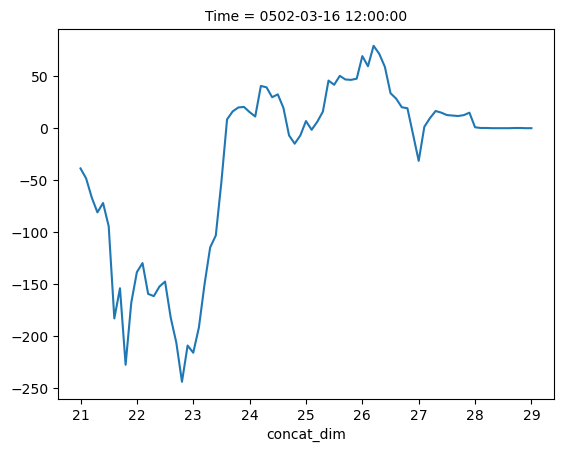

In [19]:
# Plot water mass transformation # March of year 501-503 v2.1
wmt['totalTrans'].plot()

In [20]:
wmt_march501to3_v2_1 = wmt

In [15]:
wmt_march531to3 = wmt

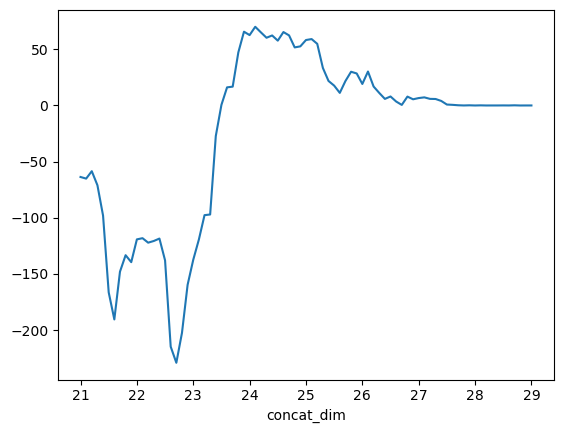

In [14]:
# Plot water mass transformation # March of year 531-533
wmt['totalTrans'].plot()

In [11]:
wmt_march501to3 = wmt

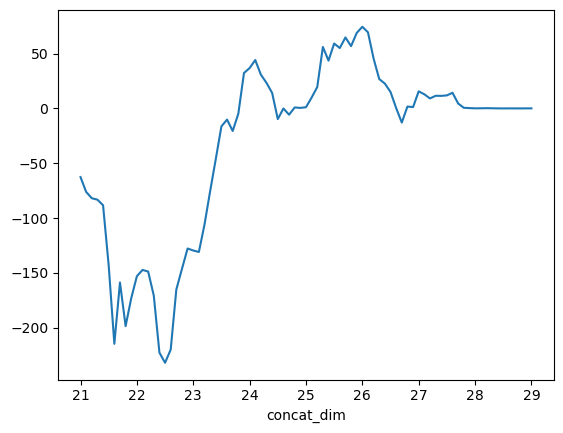

In [10]:
# Plot water mass transformation # March of year 501-503
wmt['totalTrans'].plot()

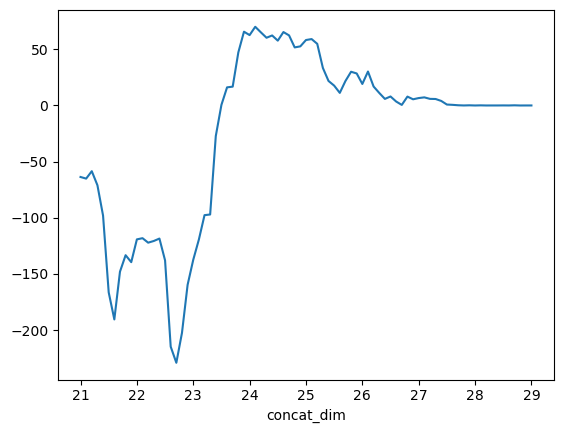

In [14]:
# Plot water mass transformation # March of year 531-533
wmt['totalTrans'].plot()

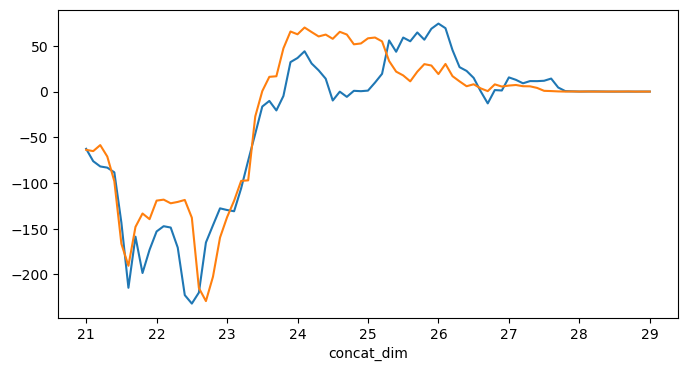

In [40]:
# Plot water mass transformation # March of year 531-533
fig = plt.figure (figsize= [8,4])
wmt_march501to3['totalTrans'].plot()
wmt_march531to3['totalTrans'].plot()

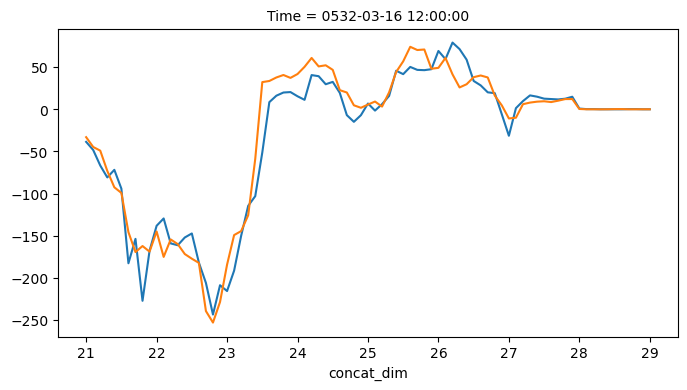

In [41]:
# Plot water mass transformation # March of year 531-533
fig = plt.figure (figsize= [8,4])
wmt_march501to3_v2_1['totalTrans'].plot()
wmt_march531to3_v2_1['totalTrans'].plot()

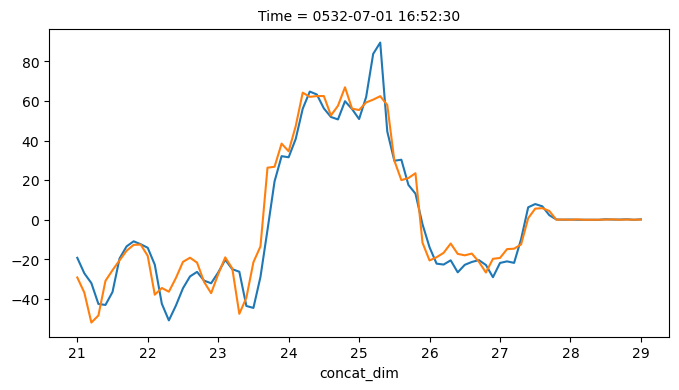

In [59]:
# Plot water mass transformation # March of year 531-533
fig = plt.figure (figsize= [8,4])
wmt_annual501to3_v2_1['totalTrans'].plot()
wmt_annual531to3_v2_1['totalTrans'].plot()

In [5]:
wmt.keys()

dict_keys(['heatTrans', 'saltTrans', 'totalTrans'])

In [38]:
np.shape(wmt_march501to3['totalTrans'])

(81,)

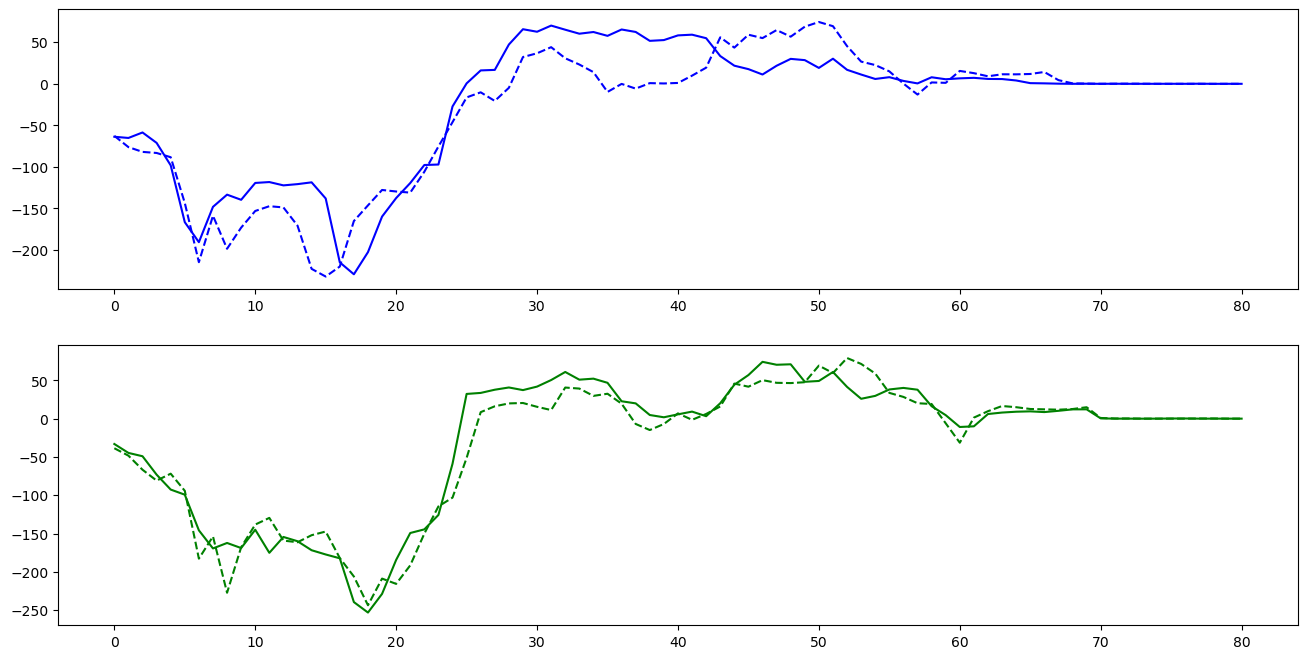

In [32]:
fig, ax = plt.subplots(2, 1, figsize = [16, 8])
ax[0].plot(wmt_march501to3['totalTrans'][:], 'b--')
ax[0].plot(wmt_march531to3['totalTrans'][:], 'b-')
ax[1].plot(wmt_march501to3_v2_1['totalTrans'], 'g--')
ax[1].plot(wmt_march531to3_v2_1['totalTrans'], 'g-')

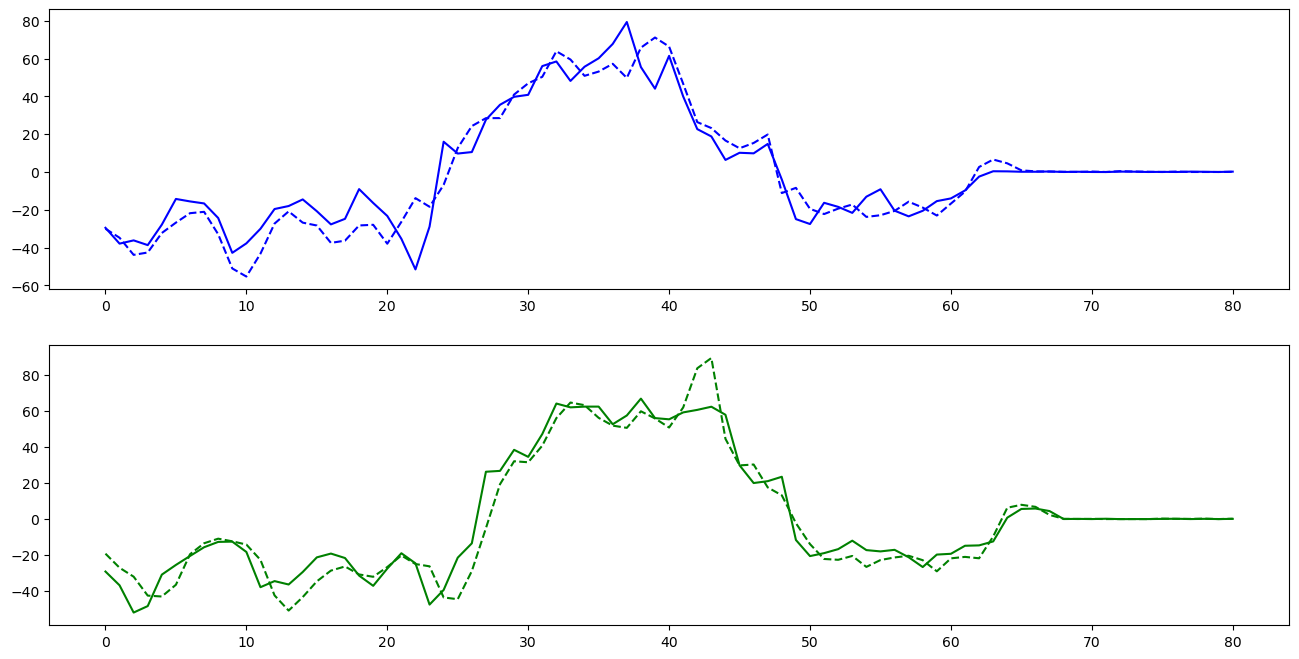

In [58]:
fig, ax = plt.subplots(2, 1, figsize = [16, 8])
ax[0].plot(wmt_annual501to3['totalTrans'][:], 'b--')
ax[0].plot(wmt_annual531to3['totalTrans'][:], 'b-')
ax[1].plot(wmt_annual501to3_v2_1['totalTrans'], 'g--')
ax[1].plot(wmt_annual531to3_v2_1['totalTrans'], 'g-')